### Практика - Визуализация Деревьев Решений 

#### Задание

```
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
 
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target
 
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
 
# Создание и обучение модели DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
 
# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()
```

#### Пояснение

- Импорт библиотек:
  - matplotlib.pyplot для визуализации.
  - sklearn.datasets для загрузки набора данных.
  - sklearn.tree для работы с деревьями решений.
  - sklearn.model_selection для разделения данных.
- Загрузка данных:
  - Используем набор данных iris из sklearn.datasets.
  - X содержит признаки (features).
  - y содержит метки классов (target).
- Разделение данных:
  - train_test_split разделяет данные на обучающую и тестовую выборки.
  - random_state=0 обеспечивает воспроизводимость результатов.
- Создание и обучение модели:
  - Создаем объект DecisionTreeClassifier с максимальной глубиной max_depth=3.
  - Обучаем модель на обучающих данных (X_train, y_train).
- Визуализация дерева решений:
  - plot_tree визуализирует дерево решений.
  - feature_names задает имена признаков.
  - class_names задает имена классов.
  - filled=True закрашивает узлы дерева разными цветами в зависимости от класса.
  - rounded=True скругляет углы узлов.
  - fontsize=10 устанавливает размер шрифта.
- Отображение графика:
  - plt.show() отображает график дерева решений.


#### Решение

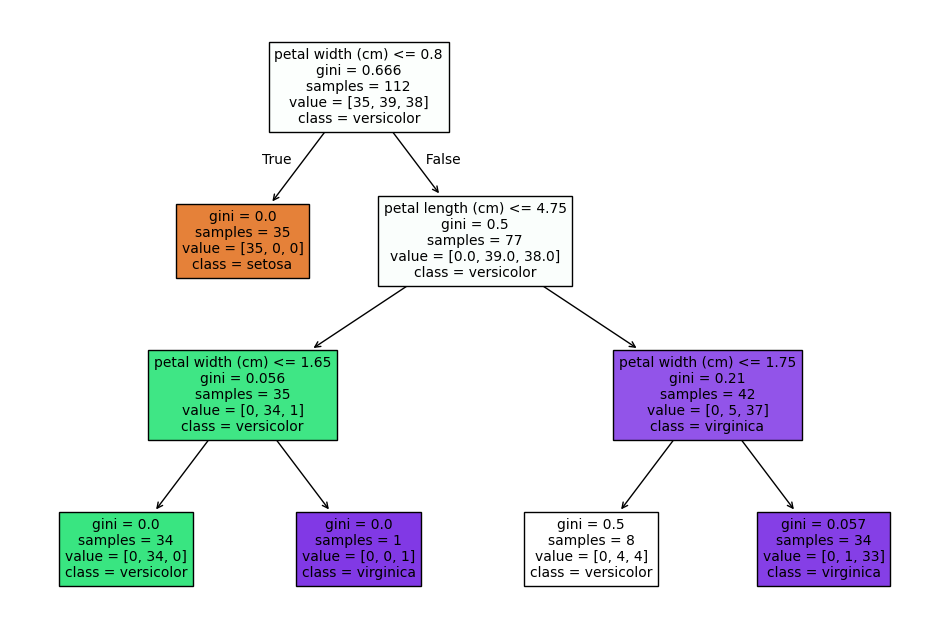

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Создание и обучение модели DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=False,
          fontsize=10)
plt.show()

- Импорт метрик. Импортируем функции для расчета метрик.: `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score` 
- Используем обученную модель для предсказания меток классов на тестовых данных. Предсказание на тестовых данных: `y_pred = clf.predict(X_test)`
- Расчет метрик:
```
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
```
- - accuracy_score: доля правильных ответов.
- - precision_score: точность - доля правильно предсказанных положительных классов из всех предсказанных положительных.
- - recall_score: полнота - доля правильно предсказанных положительных классов из всех реальных положительных.
- - f1_score: гармоническое среднее между точностью и полнотой.
- - average='weighted': взвешенное среднее значение метрик для всех классов (учитывается количество объектов каждого класса).

- Вывод метрик. Выводим значения метрик с точностью до 4 знаков после запятой.
```
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
```
- Теперь код выведет не только визуализацию дерева решений, но и значения accuracy, precision, recall и F1-score, которые характеризуют качество модели на тестовых данных.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


### Практика - Случайный лес (Random Forest) как пример бэггинга

#### Задание

```
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Создание модели Random Forest
# n_estimators - количество деревьев в лесу
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Обучение модели
rf_clf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = rf_clf.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Визуализация важности признаков
importances = rf_clf.feature_importances_
plt.barh(iris.feature_names, importances)
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Важность признаков в Random Forest")
plt.show()





#### Пояснение

- Импорт: Импортируем необходимые библиотеки, включая RandomForestClassifier из sklearn.ensemble.
- Данные: Загружаем набор данных iris и разделяем его на обучающую и тестовую выборки.
- Модель: Создаем объект RandomForestClassifier с 100 деревьями (n_estimators=100) и random_state=0 для воспроизводимости.
- Обучение: Обучаем модель на тренировочных данных.
- Предсказание: Получаем предсказания на тестовых данных.
- Оценка: Вычисляем и выводим точность модели на тестовых данных.
- Важность признаков:
  - Получаем важность признаков из обученной модели (rf_clf.feature_importances_).
  - Строим столбчатую диаграмму, чтобы визуализировать важность каждого признака.

**Результат**:
Код выведет точность модели (accuracy) на тестовых данных. Дополнительно, будет построена диаграмма, показывающая важность каждого признака для модели Random Forest. Чем больше длина столбца, тем важнее данный признак для классификации.

#### Решение

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
# Создание модели Random Forest
# n_estimators - количество деревьев в лесу
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Обучение модели
rf_clf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = rf_clf.predict(X_test)

Accuracy: 0.9737


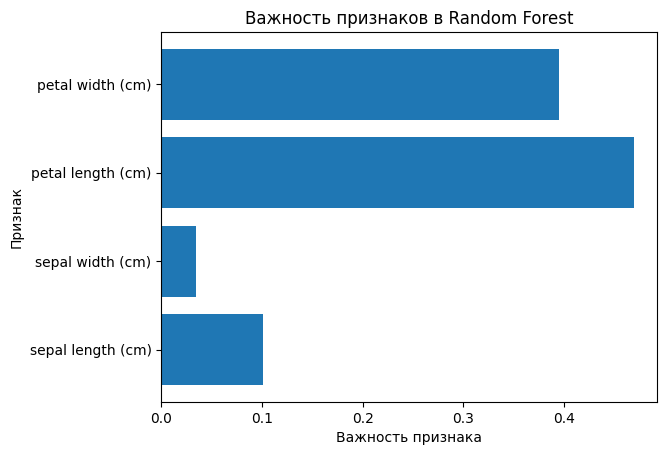

In [19]:
# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Визуализация важности признаков
importances = rf_clf.feature_importances_
plt.barh(iris.feature_names, importances)
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Важность признаков в Random Forest")
plt.show()

### Практика - Классификация пациентов на больных и здоровых при несбалансированных данных.

#### Задание

```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import numpy as np

# Создание DataFrame с данными (пример)
data = {'symptom_1': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
        'symptom_2': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
        'symptom_3': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
        'target': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]}
df = pd.DataFrame(data)

# Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Исследование данных
print(f"Количество объектов каждого класса: {y.value_counts()}")

# Видно, что данные несбалансированы: класс 1 значительно меньше
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Модель без учета несбалансированности
clf_base = DecisionTreeClassifier(random_state=42)
clf_base.fit(X_train, y_train)
y_pred_base = clf_base.predict(X_test)

print("\nБазовая модель:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_base):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_base):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_base):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1]):.4f}")

# 2. Модель с взвешиванием классов
class_weights = class_weight.compute_class_weight('balanced', np.array([0,1]), y= y_train)
clf_balanced = DecisionTreeClassifier(random_state=42, class_weight={0: class_weights[0], 1: class_weights[1]})
clf_balanced.fit(X_train, y_train)
y_pred_balanced = clf_balanced.predict(X_test)

print("\nМодель с взвешиванием классов:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_balanced):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, clf_balanced.predict_proba(X_test)[:, 1]):.4f}")

# 3. Модель с SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
clf_smote = DecisionTreeClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)

print("\nМодель с SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smote):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_smote):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_smote):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, clf_smote.predict_proba(X_test)[:, 1]):.4f}")
```




#### Пояснение

- Генерация данных: Создаем DataFrame с несбалансированными классами (больные/здоровые).
- Исследование: Выводим количество объектов каждого класса, чтобы подтвердить несбалансированность.
- Разделение данных: Разделяем данные на обучающую и тестовую выборки.
- Базовая модель: Обучаем DecisionTreeClassifier без учета несбалансированности. Вычисляем метрики качества, обращая внимание на низкий recall для класса меньшинства.
- Взвешивание классов: Используем class_weight='balanced' для автоматического назначения весов классам. Оцениваем метрики, наблюдая, как улучшается recall для класса меньшинства.
- SMOTE: Применяем SMOTE для генерации синтетических данных класса меньшинства. Обучаем модель на сбалансированных данных. Снова оцениваем метрики.


**Вывод**:
Важно сравнивать результаты разных подходов к борьбе с несбалансированностью. В данном примере, SMOTE и взвешивание классов могут привести к улучшению метрик для класса меньшинства, что важно для задачи медицинской диагностики, где ошибки в предсказании

#### Решение

In [21]:
!pip install imblearn

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import numpy as np

# Создание DataFrame с данными (пример)
data = {'symptom_1': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
        'symptom_2': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
        'symptom_3': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
        'target': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]}
df = pd.DataFrame(data)

# Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Исследование данных
print(f"Количество объектов каждого класса: {y.value_counts()}")

# Видно, что данные несбалансированы: класс 1 значительно меньше
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Количество объектов каждого класса: target
0    16
1     4
Name: count, dtype: int64


In [26]:
# 1. Модель без учета несбалансированности
clf_base = DecisionTreeClassifier(random_state=42)
clf_base.fit(X_train, y_train)
y_pred_base = clf_base.predict(X_test)

print("\nБазовая модель:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_base):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_base):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_base):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1]):.4f}")


Базовая модель:
Accuracy: 0.7500
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.3333


C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# 2. Модель с взвешиванием классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.array([0,1]), y= y_train)
clf_balanced = DecisionTreeClassifier(random_state=42, class_weight={0: class_weights[0], 1: class_weights[1]})
clf_balanced.fit(X_train, y_train)
y_pred_balanced = clf_balanced.predict(X_test)

print("\nМодель с взвешиванием классов:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_balanced):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, clf_balanced.predict_proba(X_test)[:, 1]):.4f}")


Модель с взвешиванием классов:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.3333


In [30]:
# 3. Модель с SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
clf_smote = DecisionTreeClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)

print("\nМодель с SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smote):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_smote):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_smote):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, clf_smote.predict_proba(X_test)[:, 1]):.4f}")


Модель с SMOTE:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.3333


### Установка NLTK 


NLTK — ведущая платформа для создания программ на Python для работы с данными на человеческом языке.
```
!pip install nltk

>>> import nltk

>>> nltk.download()
```
lОткроется окно загрузчика данных NLTK. Выберите "popular" для загрузки самых популярных наборов данных, или выберите конкретные пакеты, которые вам нужны.
```
!NLTK Downloader
   Нажмите "Download" для начала загрузки выбранных данных.
Проверка

 >>> import nltk

>>> from nltk.corpus import stopwords

 >>> print(stopwords.words('english'))
```

In [31]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.3 MB/s eta 0:00:00


In [33]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [34]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Практика - предобработки и векторизации 

#### Задача

```
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

text = "This is an example of text preprocessing for machine learning."

# Токенизация
tokens = word_tokenize(text.lower())

# Стемминг
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

# Удаление стоп-слов
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in stemmed_tokens if token not in stop_words]

# Векторизация (TF-IDF)
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform([" ".join(filtered_tokens)])

#Этот код демонстрирует базовые шаги предобработки и векторизации текста.

#### Решение

In [36]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

text = "This is an example of text preprocessing for machine learning."
print(text)

# Токенизация
tokens = word_tokenize(text.lower())
print('tokens', tokens)

# Стемминг
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print('stemmed_tokens',stemmed_tokens)

# Удаление стоп-слов
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in stemmed_tokens if token not in stop_words]
print('stop_words',stop_words)
print('filtered_tokens',filtered_tokens)

# Векторизация (TF-IDF)
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform([" ".join(filtered_tokens)])
print('vector',vector)

This is an example of text preprocessing for machine learning.
tokens ['this', 'is', 'an', 'example', 'of', 'text', 'preprocessing', 'for', 'machine', 'learning', '.']
stemmed_tokens ['thi', 'is', 'an', 'exampl', 'of', 'text', 'preprocess', 'for', 'machin', 'learn', '.']
stop_words {'so', 'had', 'there', 'couldn', 'other', "should've", 'theirs', 'shan', 'between', 'hasn', "wouldn't", 'or', 'didn', 'now', 'any', 'no', 'all', 'against', 'her', 'we', 'over', 'did', 'his', 'yourselves', 'be', 'own', 'under', 'don', 'haven', 'aren', "haven't", 'can', 'i', "that'll", 'shouldn', 'at', 'once', 'she', 'its', 'into', 'such', 'off', "wasn't", 'while', 'on', 'until', "don't", 'this', 'herself', 'them', 'the', "hasn't", 'not', 'have', 'too', 'an', 'll', 'that', 've', 'then', 'myself', 'doing', 'me', "you've", 'where', 'as', 'they', 'having', 'their', 'just', "hadn't", 'out', 'which', "couldn't", 'and', 'ain', 'of', 'm', 'ma', 'these', 'himself', "you'll", 'a', "you'd", 'yourself', 'before', 'again'

### Практика -  Наивный Байесовский классификатор

#### Задание

```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Пример данных (отзывы о фильмах)
data = {
    'text': [
        "This movie was amazing! I loved it.",
        "A complete waste of time. So boring.",
        "Excellent acting and a gripping plot.",
        "I fell asleep halfway through.",
        "Highly recommended! A must-see.",
        "This is the worst movie I have ever seen."
    ],

    'sentiment': [
        'positive',
        'negative',
        'positive',
        'negative',
        'positive',
        'negative'
    ]
}

df = pd.DataFrame(data)

# 1. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# 2. Векторизация текста (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 3. Создание и обучение модели Наивного Байесовского классификатора
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# 4. Предсказание на тестовой выборке
y_pred = nb_classifier.predict(X_test_vec)

# 5. Оценка качества модели
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
```




#### Пояснение

- Данные: Создаем DataFrame с примерами отзывов о фильмах и их сентиментом (положительный/отрицательный).
- Разделение данных: Делим данные на обучающую и тестовую выборки.
- Векторизация:
    - Используем TfidfVectorizer для преобразования текстовых отзывов в числовые векторы TF-IDF.
    - Обучаем vectorizer на тренировочных данных и применяем его к тестовым.
- Модель:
    - Создаем объект MultinomialNB (Наивный Байесовский классификатор для множественных классов).
    - Обучаем модель на векторах признаков тренировочных данных и соответствующих метках классов.
- Предсказание: Получаем предсказания модели на тестовых данных.
- Оценка: Выводим метрики качества модели:
    - accuracy_score - доля правильных ответов.
    - classification_report - подробный отчет о precision, recall, f1-score для каждого класса.



**Результат**:
Код выведет значения метрик, демонстрируя работу Наивного Байесовского классификатора для задачи анализа тональности текста. 

#### Решение

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Пример данных (отзывы о фильмах)
df = pd.DataFrame(data = {'text': ["This movie was amazing! I loved it.","A complete waste of time. So boring.","Excellent acting and a gripping plot.",
                                   "I fell asleep halfway through.","Highly recommended! A must-see.","This is the worst movie I have ever seen."],
                          'sentiment': ['positive','negative','positive','negative','positive','negative']})

# 1. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# 2. Векторизация текста (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 3. Создание и обучение модели Наивного Байесовского классификатора
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# 4. Предсказание на тестовой выборке
y_pred = nb_classifier.predict(X_test_vec)

# 5. Оценка качества модели
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5000

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
